In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
t = pd.read_csv("/content/ToyotaCorolla.csv")
t.head(10)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
5,12950,32,61000,90,2000,3,5,210,1170
6,16900,27,94612,90,2000,3,5,210,1245
7,18600,30,75889,90,2000,3,5,210,1245
8,21500,27,19700,192,1800,3,5,100,1185
9,12950,23,71138,69,1900,3,5,185,1105


In [3]:
t=t.rename({'Price':'price','Age_08_04':'age','KM':'km','HP':'hp','Doors':'door','Gears':'gear','Quarterly_Tax':'qt','Weight':'weight'},axis=1)
t.head()

,price,age,km,hp,cc,door,gear,qt,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [4]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   1436 non-null   int64
 1   age     1436 non-null   int64
 2   km      1436 non-null   int64
 3   hp      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   door    1436 non-null   int64
 6   gear    1436 non-null   int64
 7   qt      1436 non-null   int64
 8   weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [5]:
t.isna().sum()

price     0
age       0
km        0
hp        0
cc        0
door      0
gear      0
qt        0
weight    0
dtype: int64

In [6]:
t.corr()

,price,age,km,hp,cc,door,gear,qt,weight
price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
km,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
hp,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
door,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
gear,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
qt,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


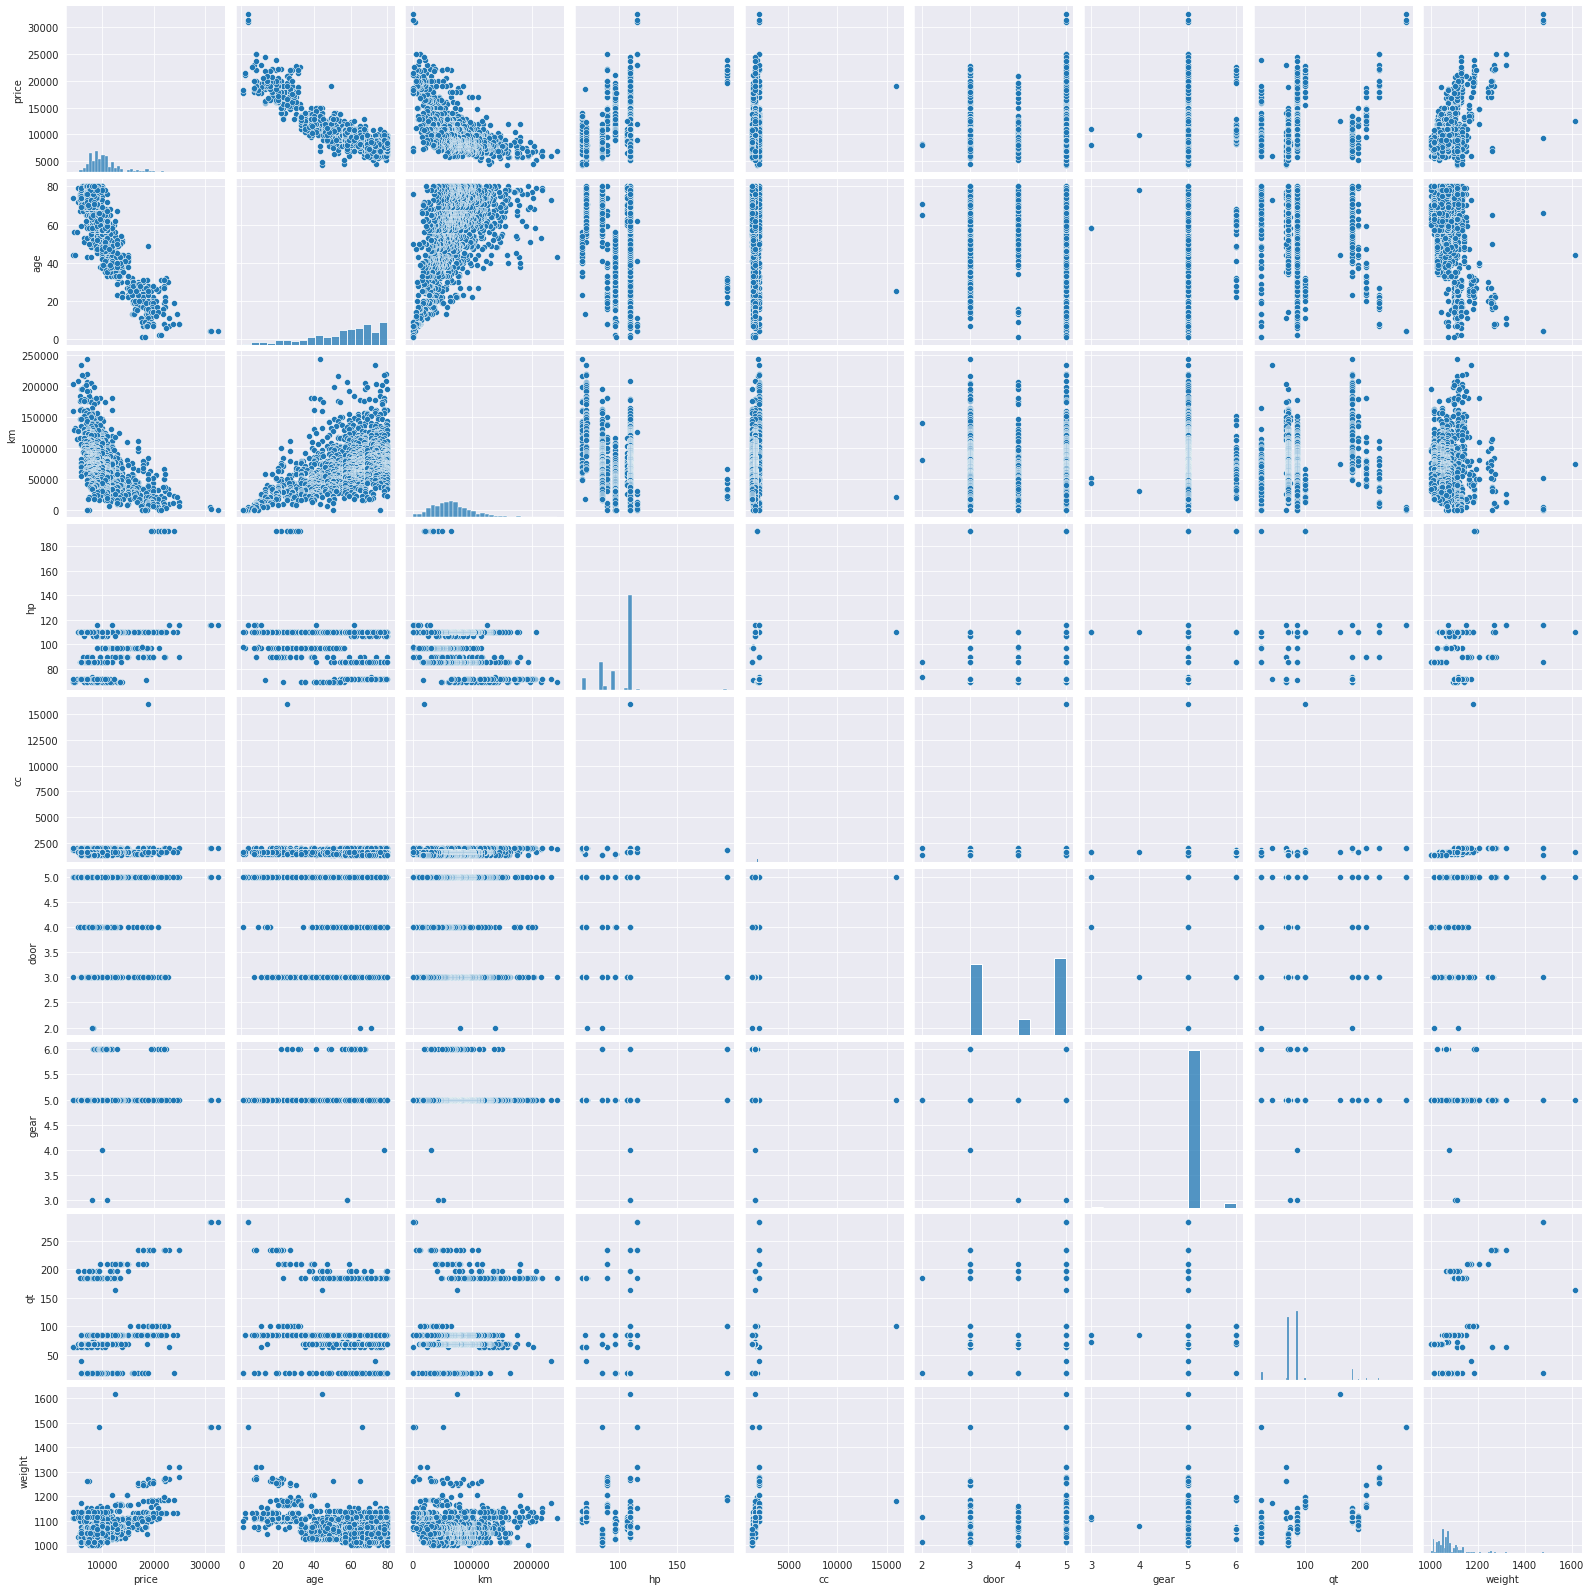

In [7]:
sns.set_style(style='darkgrid')
sns.pairplot(t)

In [8]:
import statsmodels.formula.api as smf 
model = smf.ols('price~age+km+hp+cc+door+gear+weight',data=t).fit()

In [9]:
model.params

Intercept   -7116.713686
age          -122.234520
km             -0.019867
hp             28.480905
cc             -0.088120
door          -10.679443
gear          620.416571
weight         18.854232
dtype: float64

In [10]:
print(model.tvalues, '\n', model.pvalues)

Intercept    -5.395759
age         -46.725228
km          -16.344309
hp           10.878217
cc           -0.982650
door         -0.266951
gear          3.142596
weight       21.781234
dtype: float64 
 Intercept     7.978310e-08
age          5.524482e-290
km            3.531345e-55
hp            1.556180e-26
cc            3.259461e-01
door          7.895455e-01
gear          1.708992e-03
weight        4.742165e-91
dtype: float64


In [11]:
(model.rsquared,model.rsquared_adj)

(0.8628951602234527, 0.8622230776755284)

In [12]:
ml_v=smf.ols('price~age',data = t).fit()  
print(ml_v.tvalues, '\n', ml_v.pvalues) 

Intercept    138.907847
age          -68.978267
dtype: float64 
 Intercept    0.0
age          0.0
dtype: float64


In [13]:
ml_v=smf.ols('price~km',data = t).fit()  
print(ml_v.tvalues, '\n', ml_v.pvalues) 

Intercept    88.510378
km          -26.267601
dtype: float64 
 Intercept     0.000000e+00
km           1.757913e-124
dtype: float64


In [14]:
ml_v=smf.ols('price~hp',data = t).fit()  
print(ml_v.tvalues, '\n', ml_v.pvalues) 

Intercept     4.803134
hp           12.567862
dtype: float64 
 Intercept    1.725695e-06
hp           1.926234e-34
dtype: float64


In [15]:
ml_v=smf.ols('price~cc',data = t).fit()  
print(ml_v.tvalues, '\n', ml_v.pvalues) 

Intercept    24.694090
cc            4.824822
dtype: float64 
 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [16]:
ml_v=smf.ols('price~door',data = t).fit()  
print(ml_v.tvalues, '\n', ml_v.pvalues) 

Intercept    19.258097
door          7.141657
dtype: float64 
 Intercept    1.094732e-73
door         1.461237e-12
dtype: float64


In [17]:
ml_v=smf.ols('price~gear',data = t).fit()  
print(ml_v.tvalues, '\n', ml_v.pvalues) 

Intercept    1.814534
gear         2.394401
dtype: float64 
 Intercept    0.069804
gear         0.016775
dtype: float64


In [18]:
ml_v=smf.ols('price~qt',data = t).fit()  
print(ml_v.tvalues, '\n', ml_v.pvalues) 

Intercept    41.330311
qt            8.507487
dtype: float64 
 Intercept    1.532168e-246
qt            4.407393e-17
dtype: float64


In [19]:
ml_v=smf.ols('price~weight',data = t).fit()  
print(ml_v.tvalues, '\n', ml_v.pvalues) 

Intercept   -20.263590
weight       27.045855
dtype: float64 
 Intercept     1.739508e-80
weight       1.630487e-130
dtype: float64


In [20]:
rsq_age = smf.ols('age~km+hp+cc+door+gear+qt+weight',data=t).fit().rsquared  
vif_age = 1/(1-rsq_age)

In [21]:
rsq_km = smf.ols('km~age+hp+cc+door+gear+qt+weight',data=t).fit().rsquared  
vif_km = 1/(1-rsq_km)

In [22]:
rsq_hp = smf.ols('hp~age+km+cc+door+gear+qt+weight',data=t).fit().rsquared  
vif_hp = 1/(1-rsq_hp)

In [23]:
rsq_cc = smf.ols('cc~age+km+hp+door+gear+qt+weight',data=t).fit().rsquared  
vif_cc = 1/(1-rsq_cc)

In [24]:
rsq_door = smf.ols('door~age+km+hp+cc+gear+qt+weight',data=t).fit().rsquared  
vif_door = 1/(1-rsq_door)

In [25]:
rsq_gear = smf.ols('gear~age+km+hp+cc+door+qt+weight',data=t).fit().rsquared  
vif_gear = 1/(1-rsq_gear)

In [26]:
rsq_qt = smf.ols('qt~age+km+hp+cc+door+gear+weight',data=t).fit().rsquared  
vif_qt = 1/(1-rsq_qt)

In [27]:
rsq_weight = smf.ols('weight~age+km+hp+cc+door+gear+qt',data=t).fit().rsquared  
vif_weight = 1/(1-rsq_weight)

In [39]:
d1 = {'Variables':['age','km','hp','cc','door','gear','qt','weight'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_door,vif_gear,vif_qt,vif_weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,age,1.884620
1,km,1.756905
2,hp,1.419422
3,cc,1.163894
4,door,1.156575
5,gear,1.098723
6,qt,2.311431
7,weight,2.516420


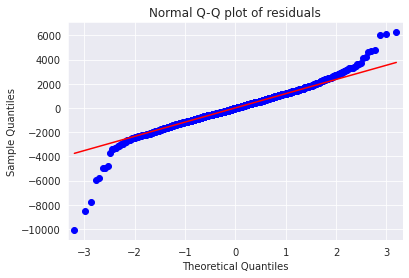

In [40]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [30]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

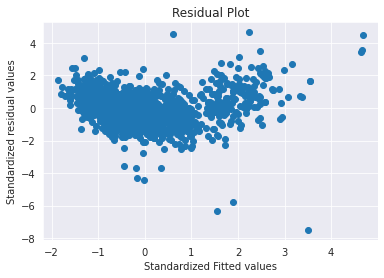

In [31]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

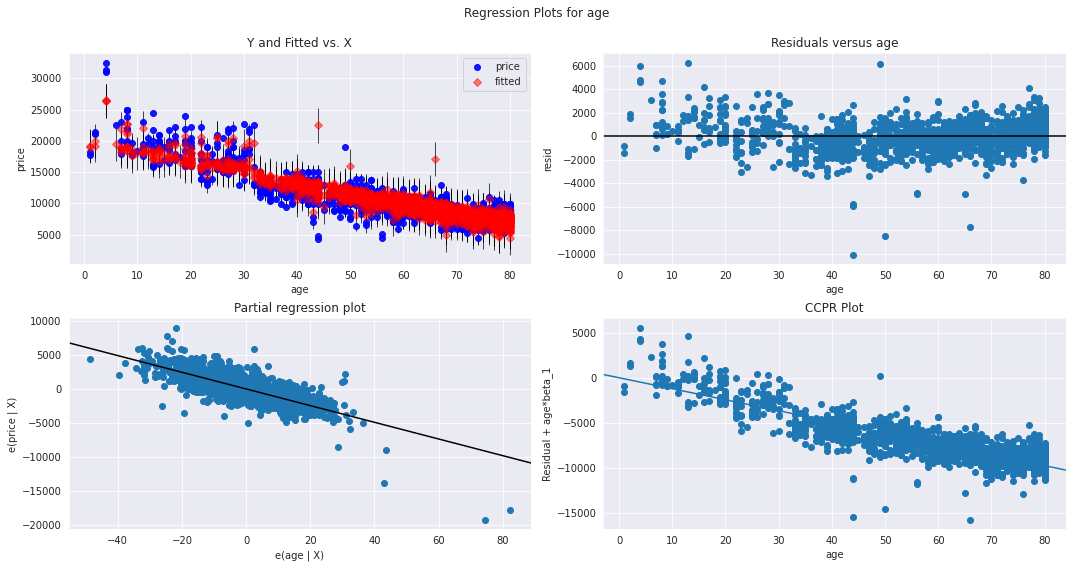

In [32]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "age", fig=fig)
plt.show()

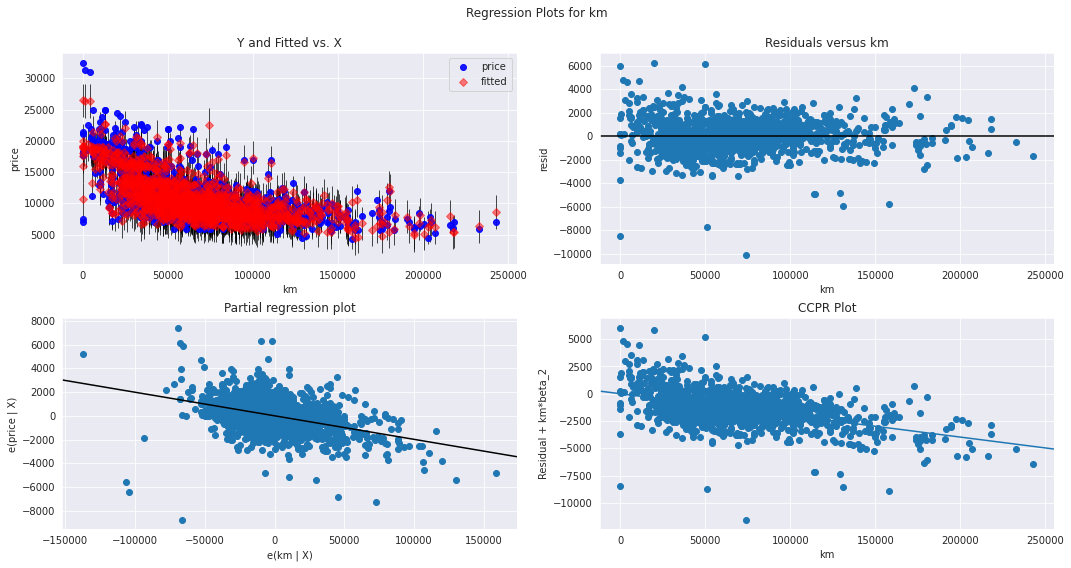

In [33]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "km", fig=fig)
plt.show()

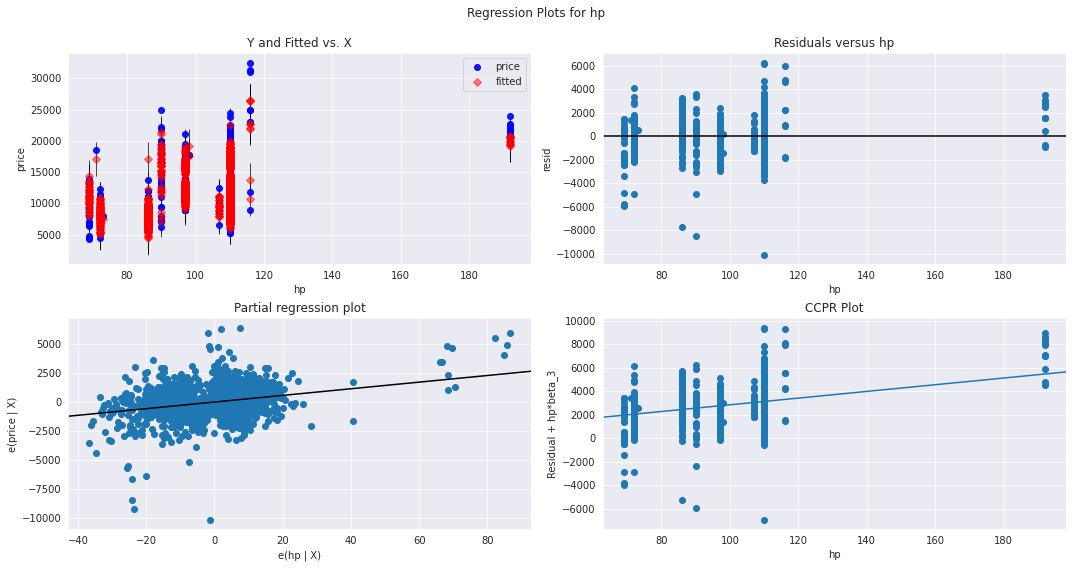

In [34]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "hp", fig=fig)
plt.show()

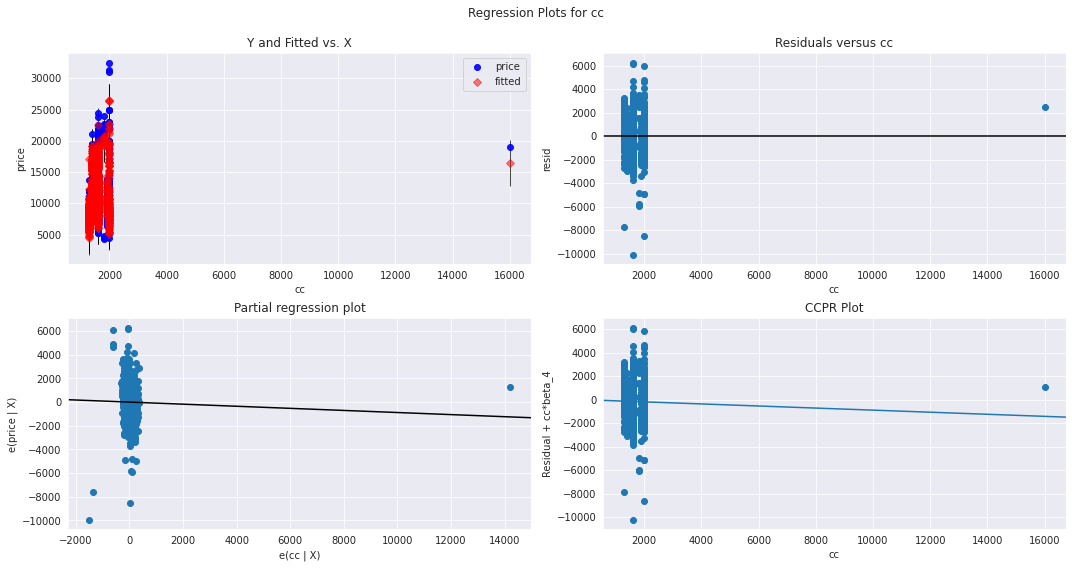

In [35]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

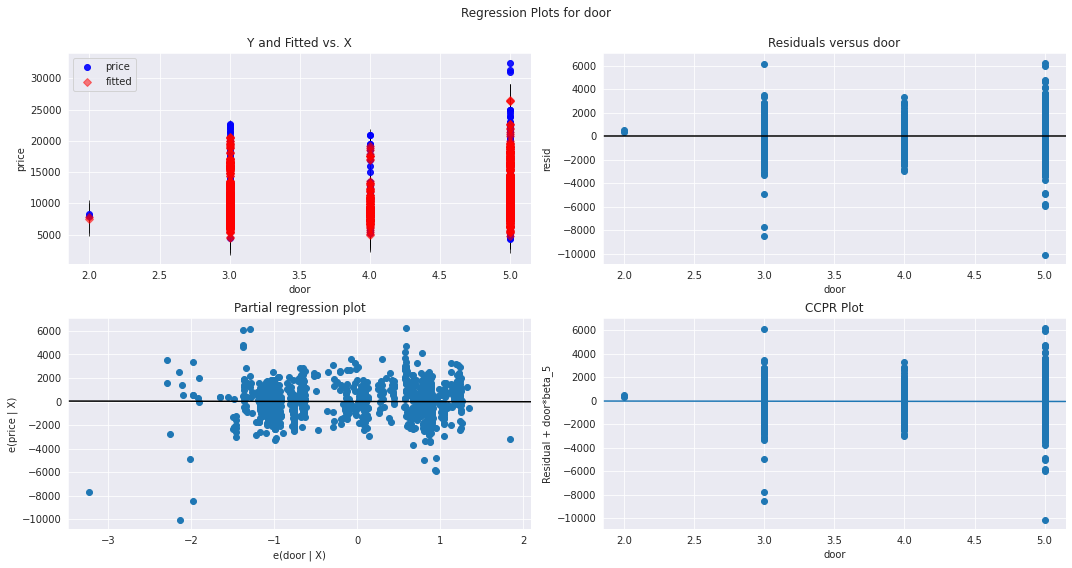

In [36]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "door", fig=fig)
plt.show()

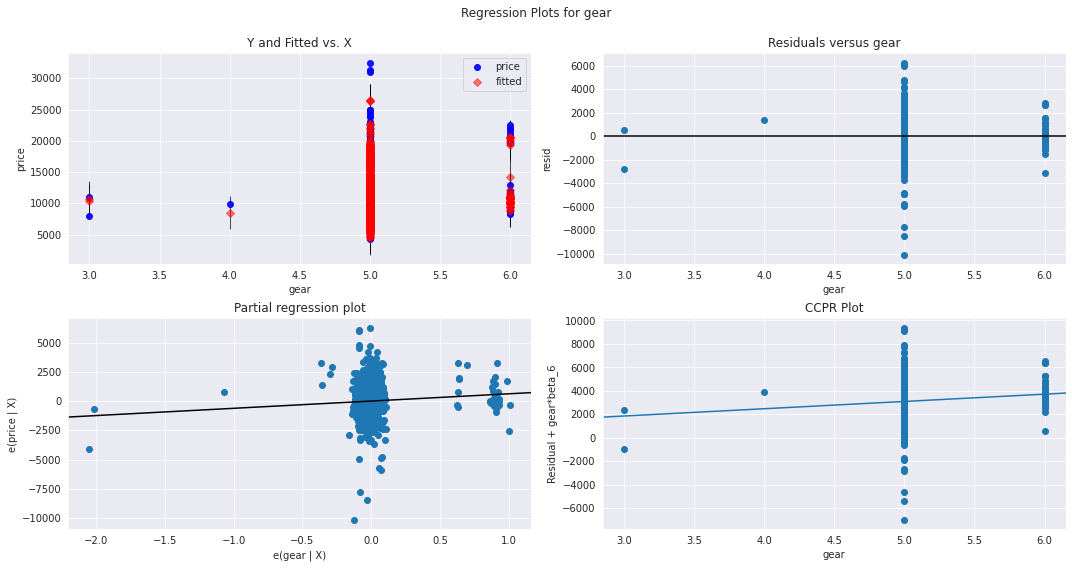

In [37]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "gear", fig=fig)
plt.show()

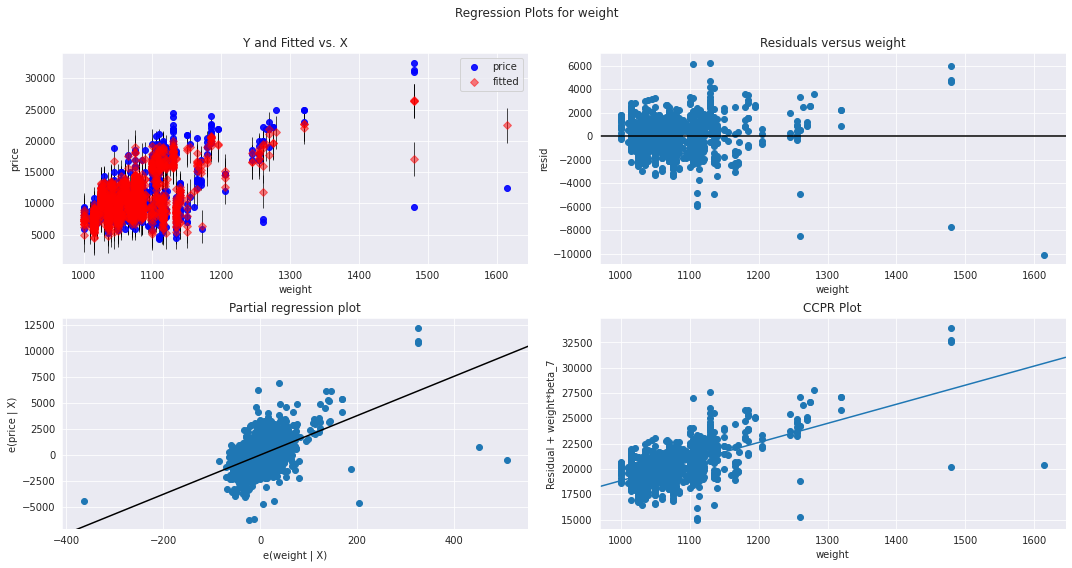

In [41]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "weight", fig=fig)
plt.show()

In [42]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

<ipython-input-43-77689be3e505>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(t)), np.round(c, 3))


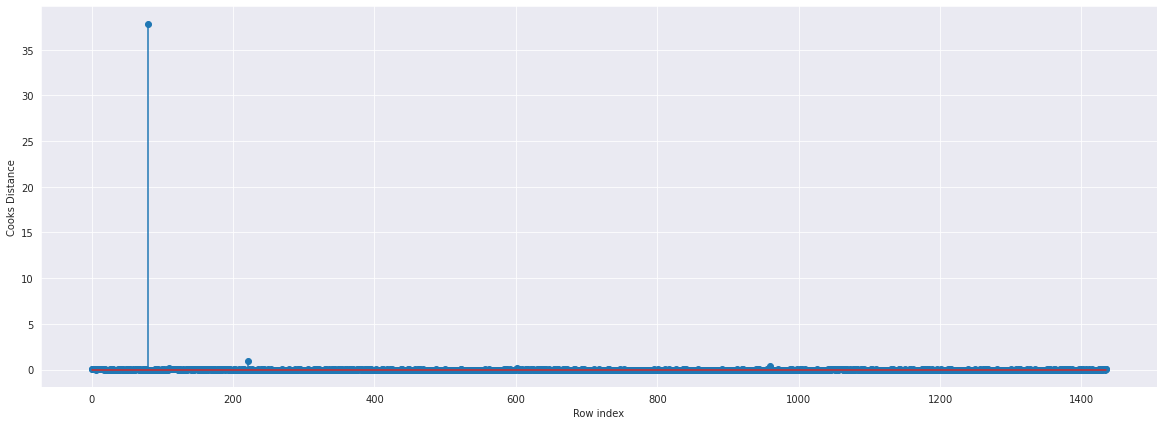

In [43]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(t)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [44]:
(np.argmax(c),np.max(c))

(80, 37.8721611611412)

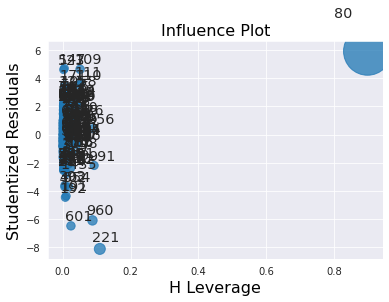

In [45]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [46]:
k = t.shape[1]
n = t.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [57]:
t[t.index.isin([80])]

,price,age,km,hp,cc,door,gear,qt,weight
80,18950,25,20019,110,16000,5,5,100,1180


In [59]:
t=t.drop(t.index[[80]],axis=0)

In [60]:
t.head(85)

,price,age,km,hp,cc,door,gear,qt,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
81,17250,29,20000,110,1600,5,5,85,1115
82,15450,25,17003,97,1400,5,5,85,1110
83,17950,31,16238,110,1600,5,5,100,1180
84,16650,25,15414,97,1400,5,5,85,1110


In [51]:
t_new = pd.read_csv("/content/ToyotaCorolla.csv")

In [53]:
t_new=t_new.rename({'Price':'price','Age_08_04':'age','KM':'km','HP':'hp','Doors':'door','Gears':'gear','Quarterly_Tax':'qt','Weight':'weight'},axis=1)
t_new.head()

,price,age,km,hp,cc,door,gear,qt,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [61]:
t1=t_new.drop(t_new.index[[70,76]],axis=0).reset_index()

In [62]:
t1.head(85)

,index,price,age,km,hp,cc,door,gear,qt,weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
80,82,15450,25,17003,97,1400,5,5,85,1110
81,83,17950,31,16238,110,1600,5,5,100,1180
82,84,16650,25,15414,97,1400,5,5,85,1110
83,85,17450,28,8537,110,1600,5,5,85,1130


In [65]:
final_ml_V= smf.ols('age~km+hp+cc+door+gear+qt+weight',data = t).fit()

In [66]:
(final_ml_V.rsquared,final_ml_V.aic,final_ml_V.bic)

(0.47012256233971117, 11563.670414477869, 11605.821775503418)

In [67]:
final_ml_V= smf.ols('km~age+hp+cc+door+gear+qt+weight',data = t).fit()

In [68]:
(final_ml_V.rsquared,final_ml_V.aic,final_ml_V.bic)

(0.4763217824185041, 33386.01822093584, 33428.16958196139)

In [69]:
final_ml_V= smf.ols('hp~age+km+cc+door+gear+qt+weight',data = t).fit()

In [70]:
(final_ml_V.rsquared,final_ml_V.aic,final_ml_V.bic)

(0.36862105796668243, 11196.629875427356, 11238.781236452905)

In [71]:
final_ml_V= smf.ols('cc~age+km+hp+door+gear+qt+weight',data = t).fit()

In [72]:
(final_ml_V.rsquared,final_ml_V.aic,final_ml_V.bic)

(0.6369452331490904, 17650.45821416794, 17692.609575193488)

In [73]:
final_ml_V= smf.ols('door~age+km+hp+cc+gear+qt+weight',data = t).fit()

In [74]:
(final_ml_V.rsquared,final_ml_V.aic,final_ml_V.bic)

(0.1402865280219593, 3731.27712537604, 3773.42848640159)

In [75]:
final_ml_V= smf.ols('gear~age+km+hp+cc+door+qt+weight',data = t).fit()

In [76]:
(final_ml_V.rsquared,final_ml_V.aic,final_ml_V.bic)

(0.09165814998474953, -838.5064773028785, -796.3551162773286)

In [77]:
final_ml_V= smf.ols('qt~age+km+hp+cc+door+gear+weight',data = t).fit()

In [78]:
(final_ml_V.rsquared,final_ml_V.aic,final_ml_V.bic)

(0.6503326670120868, 13247.336686287312, 13289.488047312861)

In [81]:
final_ml_V= smf.ols('weight~age+km+hp+cc+door+gear+qt',data = t).fit()

In [82]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

<ipython-input-83-c0db70f8e570>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(t1)),np.round(c_V,3));


ValueError: ignored

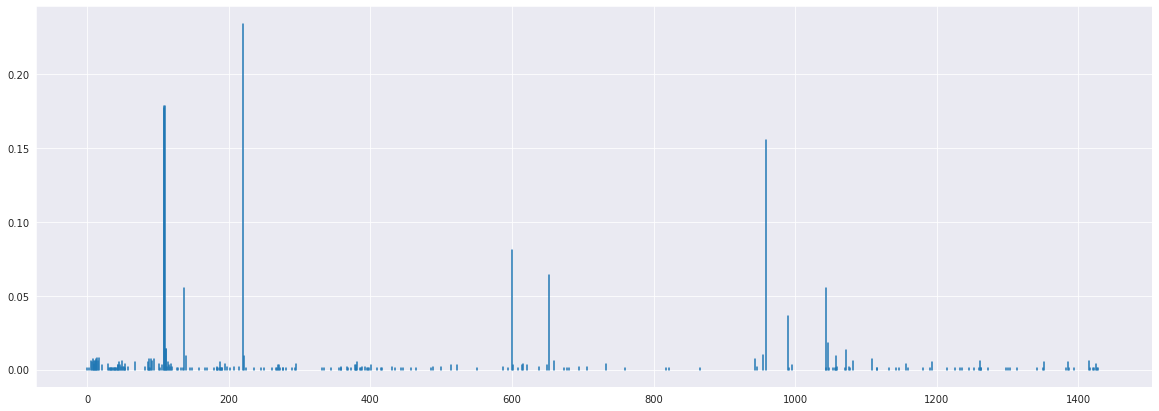

In [83]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(t1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [84]:
(np.argmax(c_V),np.max(c_V))

(220, 0.2337769365909675)

In [85]:
t2=t1.drop(t1.index[[220]],axis=0)

In [86]:
t2

,index,price,age,km,hp,cc,door,gear,qt,weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1429,1431,7500,69,20544,86,1300,3,5,69,1025
1430,1432,10845,72,19000,86,1300,3,5,69,1015
1431,1433,8500,71,17016,86,1300,3,5,69,1015
1432,1434,7250,70,16916,86,1300,3,5,69,1015


In [90]:
t3=t2.reset_index()

In [91]:
t4=t3.drop(['index'],axis=1)

In [92]:
t4

,level_0,price,age,km,hp,cc,door,gear,qt,weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1428,1429,7500,69,20544,86,1300,3,5,69,1025
1429,1430,10845,72,19000,86,1300,3,5,69,1015
1430,1431,8500,71,17016,86,1300,3,5,69,1015
1431,1432,7250,70,16916,86,1300,3,5,69,1015


In [93]:
final_ml_V= smf.ols('age~km+hp+cc+door+gear+qt+weight',data = t4).fit()

In [94]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

<ipython-input-96-967e4d76b57c>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(t4)),np.round(c_V,3));


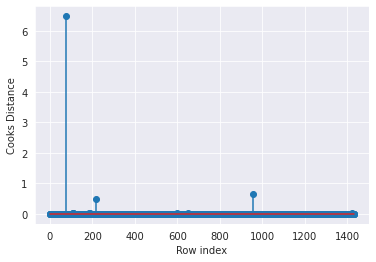

In [96]:
plt.stem(np.arange(len(t4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [97]:
(np.argmax(c_V),np.max(c_V))

(78, 6.48385313456481)

In [98]:
t4=t3.drop(t3.index[[78]],axis=0)

In [99]:
t4

,level_0,index,price,age,km,hp,cc,door,gear,qt,weight
0,0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...,...
1428,1429,1431,7500,69,20544,86,1300,3,5,69,1025
1429,1430,1432,10845,72,19000,86,1300,3,5,69,1015
1430,1431,1433,8500,71,17016,86,1300,3,5,69,1015
1431,1432,1434,7250,70,16916,86,1300,3,5,69,1015


In [106]:
t5=t4.drop(['index'],axis=1)

In [110]:
t5

,level_0,price,age,km,hp,cc,door,gear,qt,weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1428,1429,7500,69,20544,86,1300,3,5,69,1025
1429,1430,10845,72,19000,86,1300,3,5,69,1015
1430,1431,8500,71,17016,86,1300,3,5,69,1015
1431,1432,7250,70,16916,86,1300,3,5,69,1015


In [112]:
final_ml_V= smf.ols('age~km+hp+cc+door+gear+qt+weight',data = t5).fit()

In [113]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

<ipython-input-114-3ec2d0f773f5>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(t5)),np.round(c_V,3));


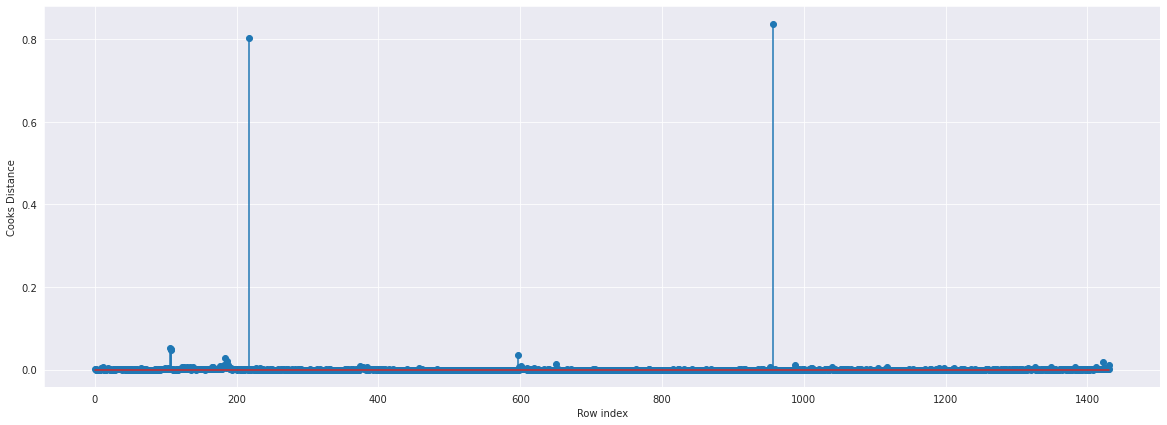

In [114]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(t5)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [115]:
(np.argmax(c_V),np.max(c_V))

(956, 0.8376244665329384)

Since the value is <1 , we can stop the diagnostic process and finalize the model

In [116]:
final_ml_V= smf.ols('age~km+hp+cc+door+gear+qt+weight',data = t5).fit()

In [117]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.46926457105822583, 11540.025555112461)

In [ ]:
new_data=pd.DataFrame({'HP':40,"VOL":95,"SP":102,"WT":35},index=[1])

In [131]:
new_data=pd.DataFrame({'age':23,"km":36786,"hp":90,"door":3, "cc":2000,"gear": 5,"qt":210, "weight":1165},index=[1])

In [132]:
final_ml_V.predict(new_data)



1    30.35618
dtype: float64

In [133]:
final_ml_V.predict(t_new.iloc[0:5,])

0    32.928728
1    39.473844
2    31.598317
3    33.184469
4    30.024143
dtype: float64

In [134]:
pred_y = final_ml_V.predict(t_new)



In [135]:
pred_y

0       32.928728
1       39.473844
2       31.598317
3       33.184469
4       30.024143
          ...    
1431    49.832901
1432    50.972140
1433    50.471755
1434    50.446534
1435    36.263859
Length: 1436, dtype: float64